## Problem4

With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Avacado_Price.csv',encoding='unicode_escape')

In [2]:
data.shape

(18249, 12)

### Null values imputation

In [3]:
data.isnull().sum().sum()

0

We observe that Actual_Shipment_Time, Shipment_Delay and Delivery_Status are null for the same set of rows. Remaining null values (406) are in Planned_TimeofTravel. We can drop these 82008 rows.

In [187]:
#Drop null valued rows
#data.dropna(inplace=True)

In [4]:
data.shape

(18249, 12)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [192]:
#data.drop(['Id'],axis=1,inplace=True)

### EDA

In [8]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [9]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [10]:
data.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [11]:
data['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [12]:
data.var()

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_9772/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


AveragePrice    1.621484e-01
Total_Volume    1.192698e+13
tot_ava1        1.600197e+12
tot_ava2        1.449906e+12
tot_ava3        1.154853e+10
Total_Bags      9.726741e+11
Small_Bags      5.567824e+11
Large_Bags      5.951939e+10
XLarge Bags     3.130385e+08
year            8.834843e-01
dtype: float64

In [13]:
data.dtypes

AveragePrice    float64
Total_Volume    float64
tot_ava1        float64
tot_ava2        float64
tot_ava3        float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [14]:
data.corr()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
tot_ava1,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
tot_ava2,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
tot_ava3,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [16]:
data.drop(['Total_Volume'],axis=1,inplace=True) #drop zero variance column

<AxesSubplot:>

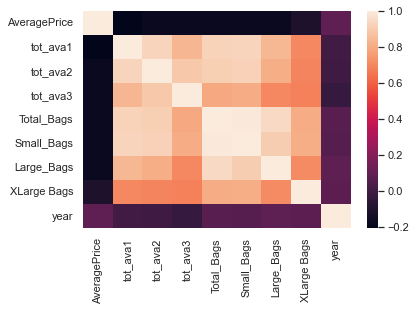

In [17]:
import seaborn as sns
sns.set()
sns.heatmap(data.corr())

In [18]:
import matplotlib.pyplot as plt

#### Label Encode

In [19]:
# Label encode Class variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data['region'] = encoder.fit_transform(data['region'])

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   tot_ava1      18249 non-null  float64
 2   tot_ava2      18249 non-null  float64
 3   tot_ava3      18249 non-null  float64
 4   Total_Bags    18249 non-null  float64
 5   Small_Bags    18249 non-null  float64
 6   Large_Bags    18249 non-null  float64
 7   XLarge Bags   18249 non-null  float64
 8   type          18249 non-null  int32  
 9   year          18249 non-null  int64  
 10  region        18249 non-null  int32  
dtypes: float64(8), int32(2), int64(1)
memory usage: 1.4 MB


In [21]:
data.head()

,AveragePrice,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


#### Drop Duplicates

In [22]:
data.duplicated().sum()

0

In [212]:
#data.drop_duplicates(subset=None, keep='first', inplace=True)

In [23]:
data.shape

(18249, 11)

In [24]:
data.columns

Index(['AveragePrice', 'tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

#### standardize

In [25]:
data.iloc[:,1:]

,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [26]:
### Standardization
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
#scaler = MinMaxScaler()
# To scale data
#scaler.fit_transform(data.iloc[:,0:4])
#ct = ColumnTransformer([('MinMax', MinMaxScaler(), data.iloc[:,0:4])],'passthrough')

numerical_columns = ['tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year', 'region']
#column_trans = make_column_transformer((numerical_columns, RobustScaler()),remainder='passthrough')
#column_trans.fit_transform(data)

preprocess = make_column_transformer(
    (StandardScaler(),numerical_columns),
    ('passthrough',['AveragePrice'])
)
data1= preprocess.fit_transform(data)
data1= pd.DataFrame(data1)
data1.columns= data.columns

In [27]:
data1

,AveragePrice,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252,1.33
1,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252,1.35
2,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252,0.93
3,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252,1.08
4,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,1.700811,1.63
18245,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,1.700811,1.71
18246,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,1.700811,1.87
18247,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,1.700811,1.93


In [29]:
data1.rename(columns = {'XLarge Bags':'XLargeBags'}, inplace = True)

In [30]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('AveragePrice ~ tot_ava1+ tot_ava2+ tot_ava3+ Total_Bags+Small_Bags+ Large_Bags+ XLargeBags+ type+ year+ region', data = data1).fit() # regression model
# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.687e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:28:51   Log-Likelihood:                -4660.1
No. Observations:               18249   AIC:                             9342.
Df Residuals:                   18238   BIC:                             9428.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1634      0.011     15.318      0.000       0.143       0.184
tot_ava1       0.3595      0.008     44.460      0.000       0.344       0.375
tot_ava2       0.1083      0.005     20.381      0.000       0.098       0.119
tot_ava3    7.812e+04   3.56e+04      2.195      0.028    8367.531    1.48e+05
Total_Bags -5.911e+04   2.69e+04     -2.195      0.028   -1.12e+05   -6330.245
Small_Bags -1.933e+04   8803.422     -2.195      0.028   -3.66e+04   -2069.823
Large_Bags -1401.5976    638.442     -2.195      0.028   -2653.003    -150.192
XLargeBags     0.0194      0.003      6.482      0.000       0.014       0.025
type          -0.0159      0.002     -6.665      0.000      -0.021      -0.011
year           0.0401      0.002     16.894      0.000       0.035       0.045
region        -0.1162      0.007    -15.692      0.000      -0.131      -0.102
==============================================================================
Omnibus:                    10438.076   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1188266.395
Skew:                           1.808   Prob(JB):                         0.00
Kurtosis:                      42.366   Cond. No.                     4.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.72e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

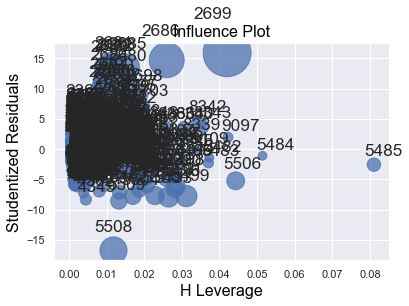

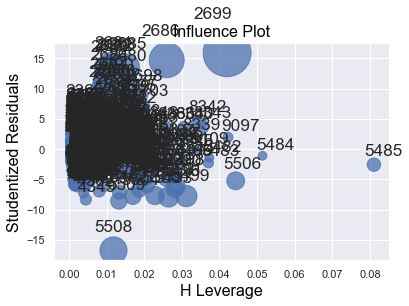

In [31]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

In [32]:
data1_new = data1.drop(data1.index[[5508]])

# Preparing model                  
ml_new = smf.ols('AveragePrice ~ tot_ava1+ tot_ava2+ tot_ava3+ Total_Bags+Small_Bags+ Large_Bags+ XLargeBags+ type+ year+ region', data = data1).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.687e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:54:54   Log-Likelihood:                -4660.1
No. Observations:               18249   AIC:                             9342.
Df Residuals:                   18238   BIC:                             9428.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1634      0.011     15.318      0.000       0.143       0.184
tot_ava1       0.3595      0.008     44.460      0.000       0.344       0.375
tot_ava2       0.1083      0.005     20.381      0.000       0.098       0.119
tot_ava3    7.812e+04   3.56e+04      2.195      0.028    8367.531    1.48e+05
Total_Bags -5.911e+04   2.69e+04     -2.195      0.028   -1.12e+05   -6330.245
Small_Bags -1.933e+04   8803.422     -2.195      0.028   -3.66e+04   -2069.823
Large_Bags -1401.5976    638.442     -2.195      0.028   -2653.003    -150.192
XLargeBags     0.0194      0.003      6.482      0.000       0.014       0.025
type          -0.0159      0.002     -6.665      0.000      -0.021      -0.011
year           0.0401      0.002     16.894      0.000       0.035       0.045
region        -0.1162      0.007    -15.692      0.000      -0.131      -0.102
==============================================================================
Omnibus:                    10438.076   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1188266.395
Skew:                           1.808   Prob(JB):                         0.00
Kurtosis:                      42.366   Cond. No.                     4.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.72e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data2 = data.iloc[:,1:]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

       feature           VIF
0     tot_ava1  1.061149e+01
1     tot_ava2  1.411728e+01
2     tot_ava3  5.606669e+00
3   Total_Bags  2.502000e+14
4   Small_Bags  1.429714e+14
5   Large_Bags  1.521486e+13
6  XLarge Bags  7.855572e+10
7         type  2.119405e+00
8         year  5.050186e+00
9       region  4.159892e+00


as weight is having highest VIF we will drop it

In [34]:
data1_new.drop(['Total_Bags'],axis=1,inplace=True) #drop zero variance column

In [35]:
# Preparing model                  
ml_new = smf.ols('AveragePrice ~ tot_ava1+ tot_ava2+ tot_ava3+Small_Bags+ Large_Bags+ XLargeBags+ type+ year+ region', data = data1).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.874e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:56:27   Log-Likelihood:                -4662.5
No. Observations:               18249   AIC:                             9345.
Df Residuals:                   18239   BIC:                             9423.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1635      0.011     15.320      0.000       0.143       0.184
tot_ava1       0.3594      0.008     44.442      0.000       0.344       0.375
tot_ava2       0.1084      0.005     20.389      0.000       0.098       0.119
tot_ava3       0.6914      0.012     55.361      0.000       0.667       0.716
Small_Bags    -0.1247      0.008    -16.135      0.000      -0.140      -0.110
Large_Bags    -0.0933      0.004    -21.394      0.000      -0.102      -0.085
XLargeBags     0.0194      0.003      6.470      0.000       0.013       0.025
type          -0.0158      0.002     -6.655      0.000      -0.020      -0.011
year           0.0401      0.002     16.907      0.000       0.035       0.045
region        -0.1163      0.007    -15.693      0.000      -0.131      -0.102
==============================================================================
Omnibus:                    10434.121   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1188224.696
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                      42.365   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
data2 = data1_new.iloc[:,1:]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

      feature        VIF
0    tot_ava1  12.048091
1    tot_ava2   5.203768
2    tot_ava3  28.981024
3  Small_Bags  11.105959
4  Large_Bags   3.525909
5  XLargeBags   1.087967
6        type   1.042192
7        year   1.052980
8      region   1.031199


In [37]:
data1_new.drop(['tot_ava3'],axis=1,inplace=True) #drop zero variance column

In [38]:
# Preparing model                  
ml_new = smf.ols('AveragePrice ~ tot_ava1+ tot_ava2+ Small_Bags+ Large_Bags+ XLargeBags+ type+ year+ region', data = data1).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.772e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:57:19   Log-Likelihood:                -6079.8
No. Observations:               18249   AIC:                         1.218e+04
Df Residuals:                   18240   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1861      0.012     16.148      0.000       0.163       0.209
tot_ava1       0.6465      0.007     96.422      0.000       0.633       0.660
tot_ava2       0.0596      0.006     10.531      0.000       0.049       0.071
Small_Bags     0.2274      0.005     47.949      0.000       0.218       0.237
Large_Bags     0.0465      0.004     12.086      0.000       0.039       0.054
XLargeBags     0.0218      0.003      6.742      0.000       0.015       0.028
type          -0.0071      0.003     -2.757      0.006      -0.012      -0.002
year           0.0425      0.003     16.580      0.000       0.038       0.048
region        -0.1323      0.008    -16.542      0.000      -0.148      -0.117
==============================================================================
Omnibus:                     8250.820   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007158.204
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                      39.318   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
data2 = data1_new.iloc[:,1:]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

      feature       VIF
0    tot_ava1  7.099848
1    tot_ava2  5.068615
2  Small_Bags  3.543087
3  Large_Bags  2.347357
4  XLargeBags  1.087871
5        type  1.038139
6        year  1.052635
7      region  1.031129


In [40]:
# Final model
final_ml = smf.ols('AveragePrice ~ tot_ava1+ tot_ava2+ Small_Bags+ Large_Bags+ XLargeBags+ type+ year+ region', data = data1).fit() # regression model
final_ml.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.772e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:58:03   Log-Likelihood:                -6079.8
No. Observations:               18249   AIC:                         1.218e+04
Df Residuals:                   18240   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1861      0.012     16.148      0.000       0.163       0.209
tot_ava1       0.6465      0.007     96.422      0.000       0.633       0.660
tot_ava2       0.0596      0.006     10.531      0.000       0.049       0.071
Small_Bags     0.2274      0.005     47.949      0.000       0.218       0.237
Large_Bags     0.0465      0.004     12.086      0.000       0.039       0.054
XLargeBags     0.0218      0.003      6.742      0.000       0.015       0.028
type          -0.0071      0.003     -2.757      0.006      -0.012      -0.002
year           0.0425      0.003     16.580      0.000       0.038       0.048
region        -0.1323      0.008    -16.542      0.000      -0.148      -0.117
==============================================================================
Omnibus:                     8250.820   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007158.204
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                      39.318   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Prediction
pred = final_ml.predict(data1)

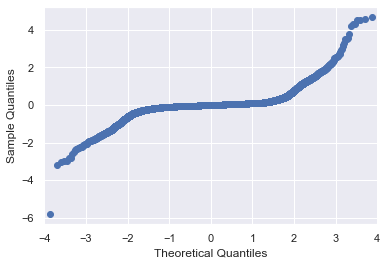

In [42]:
import matplotlib.pyplot as plt 
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

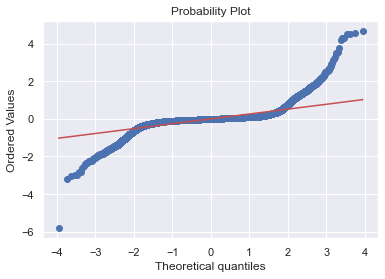

In [43]:
# Q-Q plot
from scipy import stats
import pylab
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

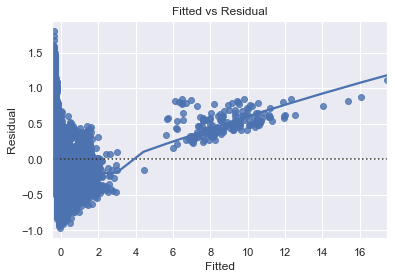

In [44]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data.AveragePrice, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [45]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1_new, test_size = 0.2) # 20% test data

In [46]:
# preparing the model on train data 
model_train = smf.ols('AveragePrice ~ tot_ava1+ tot_ava2+ Small_Bags+ Large_Bags+ XLargeBags+ type+ year+ region', data = data1).fit() # regression model

# prediction on test data set 
test_pred = model_train.predict(data_test)

# test residual values 
test_resid = test_pred - data_test.AveragePrice
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.31868126508559486

In [47]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.772e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:59:57   Log-Likelihood:                -6079.8
No. Observations:               18249   AIC:                         1.218e+04
Df Residuals:                   18240   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1861      0.012     16.148      0.000       0.163       0.209
tot_ava1       0.6465      0.007     96.422      0.000       0.633       0.660
tot_ava2       0.0596      0.006     10.531      0.000       0.049       0.071
Small_Bags     0.2274      0.005     47.949      0.000       0.218       0.237
Large_Bags     0.0465      0.004     12.086      0.000       0.039       0.054
XLargeBags     0.0218      0.003      6.742      0.000       0.015       0.028
type          -0.0071      0.003     -2.757      0.006      -0.012      -0.002
year           0.0425      0.003     16.580      0.000       0.038       0.048
region        -0.1323      0.008    -16.542      0.000      -0.148      -0.117
==============================================================================
Omnibus:                     8250.820   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007158.204
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                      39.318   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# train_data prediction
train_pred = model_train.predict(data_train)

# train residual values 
train_resid  = train_pred - data_train.AveragePrice
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.3388114819683834

In [49]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.772e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:00:07   Log-Likelihood:                -6079.8
No. Observations:               18249   AIC:                         1.218e+04
Df Residuals:                   18240   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1861      0.012     16.148      0.000       0.163       0.209
tot_ava1       0.6465      0.007     96.422      0.000       0.633       0.660
tot_ava2       0.0596      0.006     10.531      0.000       0.049       0.071
Small_Bags     0.2274      0.005     47.949      0.000       0.218       0.237
Large_Bags     0.0465      0.004     12.086      0.000       0.039       0.054
XLargeBags     0.0218      0.003      6.742      0.000       0.015       0.028
type          -0.0071      0.003     -2.757      0.006      -0.012      -0.002
year           0.0425      0.003     16.580      0.000       0.038       0.048
region        -0.1323      0.008    -16.542      0.000      -0.148      -0.117
==============================================================================
Omnibus:                     8250.820   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007158.204
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                      39.318   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""